In [46]:
################################################################
#Linear Regression
#Author: Edwyn Javier Aldana
################################################################

#Load libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Load Dataset

In [66]:
######################################################
#Uncomment the block online or local depending your
#execution environment
######################################################
#Online
dataset = pd.read_csv('Weather.csv')
# dataset.describe()
# dataset.dropna(inplace=True)
dataset

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,20602,16469,11.43,29.632,27.222222,22.222222,25.000000,0,NaN,45,...,NaN,NaN,NaN,10.2,NaN,NaN,NaN,NaN,NaN,NaN
1,20602,16470,12.7,59.264,27.777778,22.777778,25.555556,0,NaN,45,...,NaN,NaN,NaN,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2,20602,16471,4.064,50.004,27.777778,22.777778,25.555556,0,NaN,45,...,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN
3,20602,16472,22.606,40.744,26.666667,23.888889,25.555556,0,NaN,45,...,NaN,NaN,NaN,10.4,NaN,NaN,NaN,NaN,NaN,NaN
4,20602,16473,73.914,51.856,26.111111,23.888889,25.000000,0,NaN,45,...,NaN,NaN,NaN,11.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,31401,16590,0,31.484,34.444444,28.888889,31.666667,0,0.0,45,...,NaN,NaN,NaN,11.5,0.0,NaN,NaN,NaN,NaN,NaN
528,31401,16591,T,27.780,35.555556,28.333333,32.222222,0,1000.0,45,...,NaN,NaN,NaN,14.5,1000.0,NaN,NaN,NaN,NaN,NaN
529,31401,16592,2.54,33.336,30.555556,25.555556,28.333333,0,1000.0,45,...,NaN,NaN,NaN,5.5,1000.0,NaN,NaN,NaN,NaN,NaN
530,31401,16593,0,29.632,32.777778,25.555556,29.444444,0,0.0,45,...,NaN,NaN,NaN,9.0,0.0,NaN,NaN,NaN,NaN,NaN


In [90]:
WGS      = 'MinTemp'
MAX_TEMP = "MaxTemp"

Feature Selection

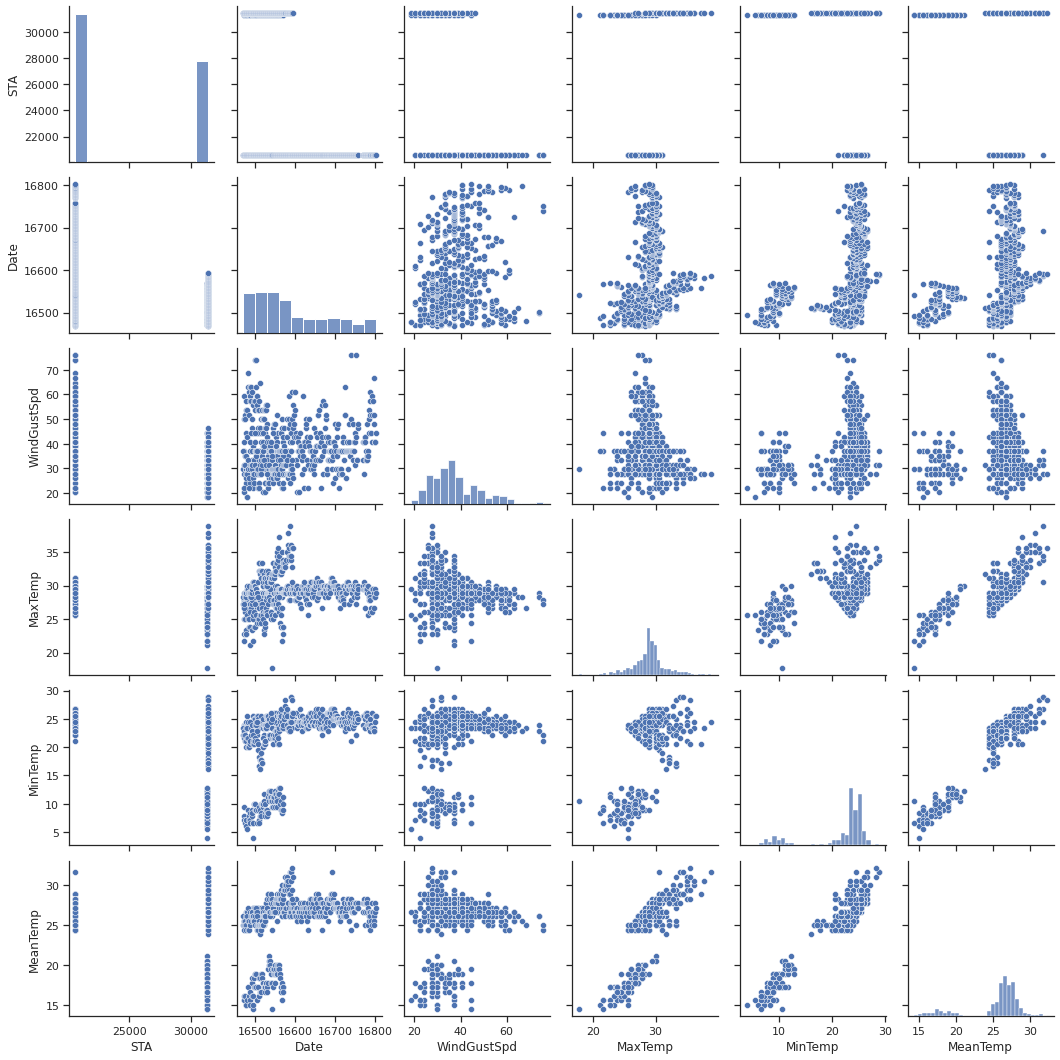

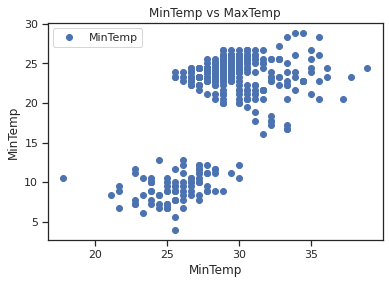

<Figure size 1080x720 with 0 Axes>

In [91]:
seabornInstance.set(style="ticks", color_codes=True)
g = seabornInstance.pairplot(dataset.loc[:, 'STA':'MeanTemp'])

#View the relationship between MinTemp and MaxTemp
# dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
dataset.plot(x=MAX_TEMP, y=WGS, style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel(WGS)  
plt.show()

#View  the distribution of the variable MaxTemp
#Exercise: Change the code to obtain the distribution of MinTemp
plt.figure(figsize=(15,10))
plt.tight_layout()
# seabornInstance.distplot(dataset['MinTemp'])
plt.show()


Define predictors and response variables

In [92]:
#Define the predictor and the output variable.
#This task depends on several assumptions based on experience, for instance, 
#It is possible assume (based on weather experts) that MaxTemp depens on MinTem.
#In other words, MaxTemp can be predicted by MinTemp
X = dataset[MAX_TEMP].values.reshape(-1,1) # Unknown rows, one column
# y = dataset['MaxTemp'].values.reshape(-1,1) # Unknown rows, one column
y = dataset[WGS].values.reshape(-1,1) # Unknown rows, one column

Define training and test datasets

In [93]:
#Define the sizes of training set and test dataset, applying 80-20 criterion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training Process

In [94]:
#Train the model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept (b0):
print(regressor.intercept_)
#For retrieving the slope (b1):
print(regressor.coef_)

[-18.41930608]
[[1.37532182]]


Testing Process

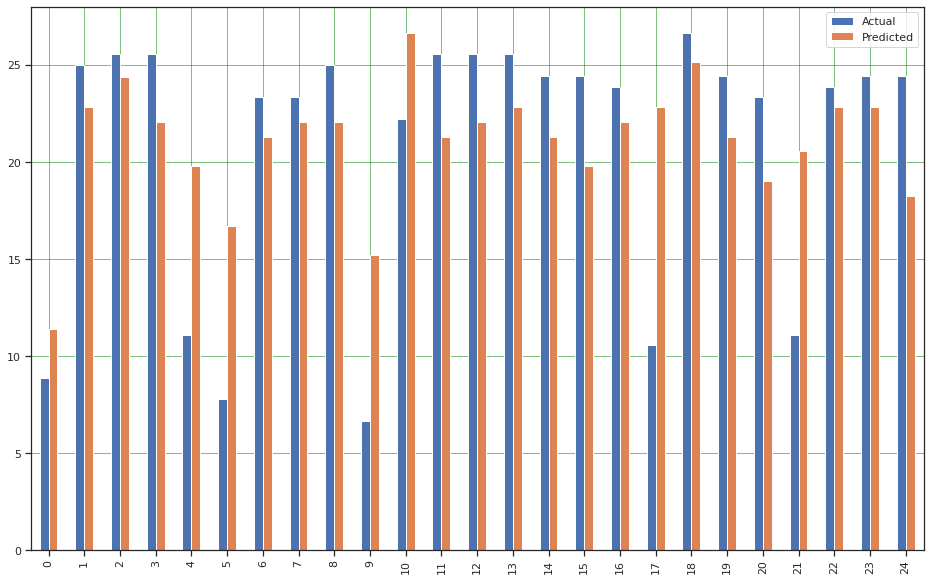

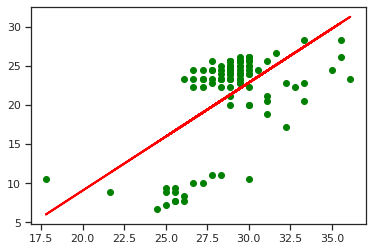

In [95]:

#Make prediction based on the model using the test data
y_pred = regressor.predict(X_test)

#Visualize the efectiveness of the prediction
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df = df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#Visualize the test dataset and the prediction
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()


Evaluating the perfomance

In [96]:

#Evaluate the model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2',metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 3.964391004869906
Mean Squared Error: 21.70012808182633
Root Mean Squared Error: 4.658339627144668
R^2 0.33571137348383595


Evaluating Residuals

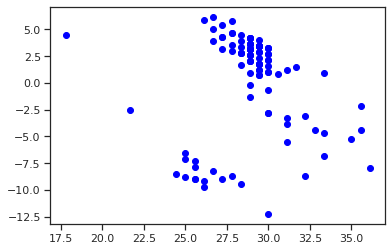

In [97]:
plt.plot(X_test,np.subtract(y_test,y_pred), 'o', color='blue',)
# plt.show()

#Error Normality
# plt.figure(figsize=(15,10))
# plt.tight_layout()
# seabornInstance.distplot(y_test-y_pred)
# plt.show()


#Homoscedasticity (Homocedasticidad): 
#The variance of the errors is constant with respect to the predicting variables or the response.
# errors=y_test-y_pred
# plt.plot(np.subtract(errors,y_pred), 'o', color='red',)
# plt.show()